In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


### What is Term Deposit?
A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution.(From Investopedia)

## Data Dictionary:
### 1. Bank Client Data
1 - age: (numeric)<br>
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education: (categorical: primary, secondary, tertiary and unknown)<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
8 - balance: Balance of the individual

### 2. Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
### 3. Other attributes:<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

### Output variable (desired target):<br>
16 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
data = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#Importing necessary libraries
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Exploratory Data Analysis

<Axes: xlabel='deposit', ylabel='count'>

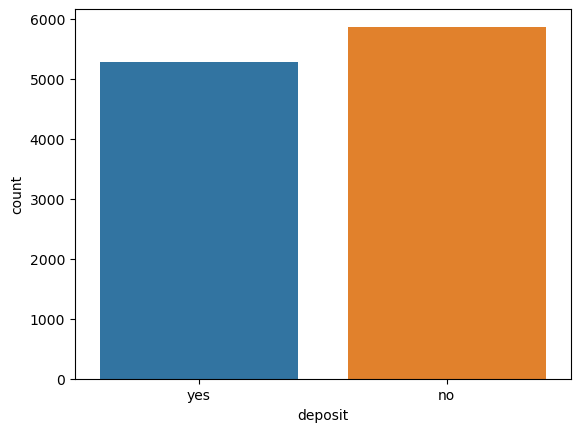

In [7]:
#LET'S CHECK OUR Y VARIABLE
sns.countplot(x='deposit',data=data)
# The y variable seems pretty balanced

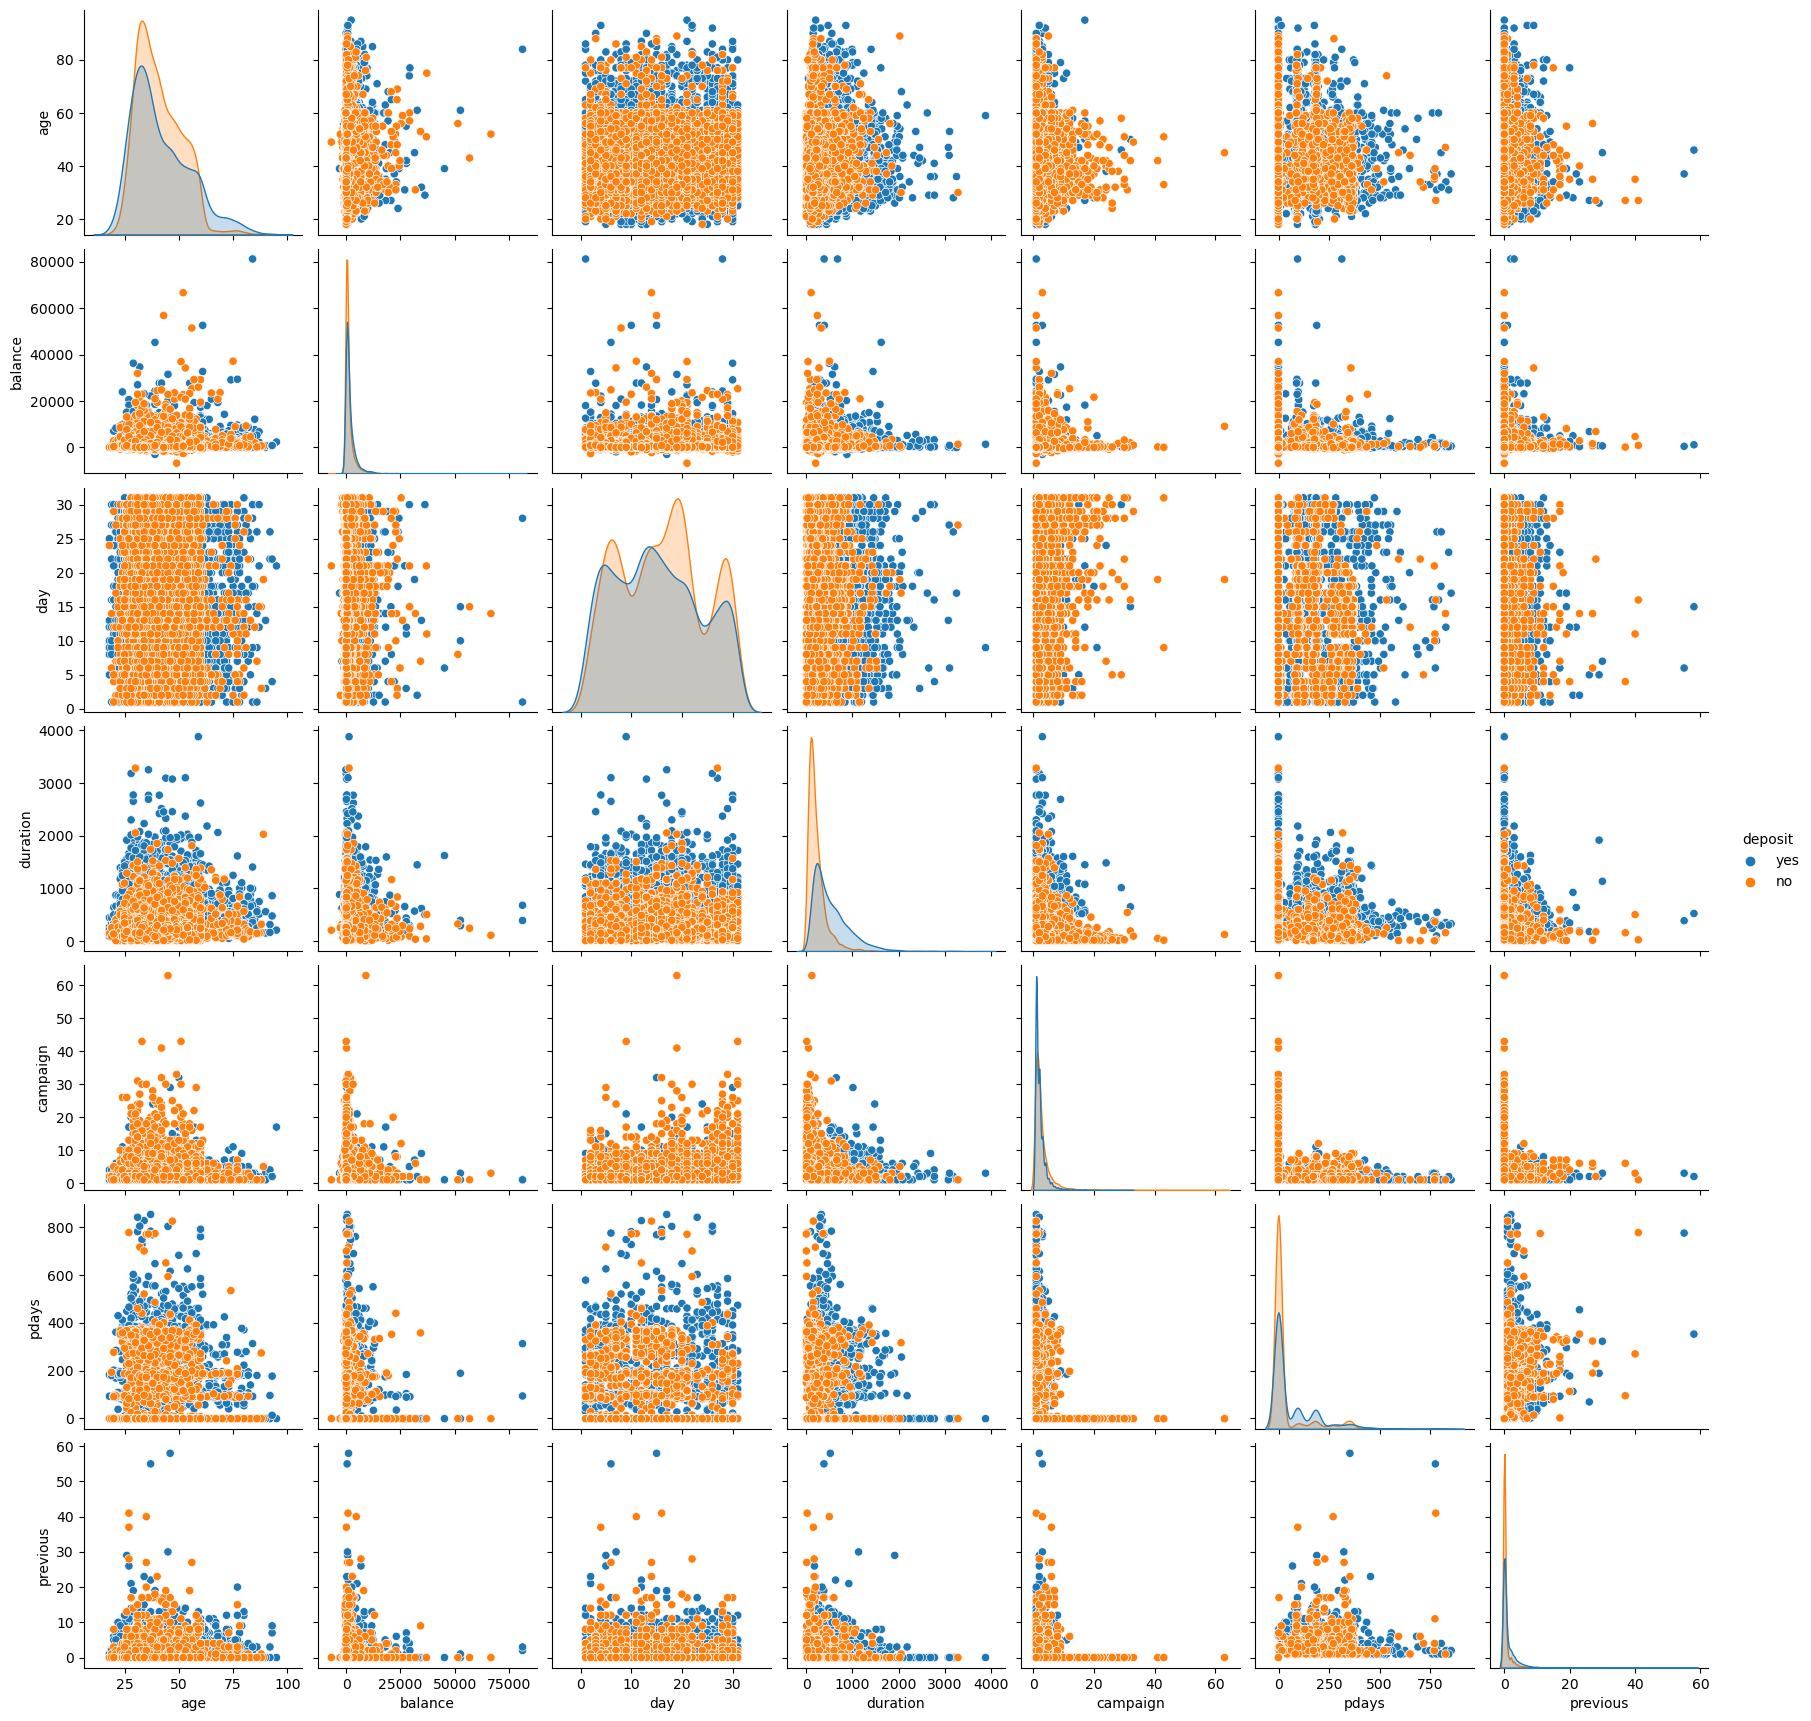

In [8]:
sns.pairplot(data,hue='deposit')

<Axes: xlabel='education', ylabel='balance'>

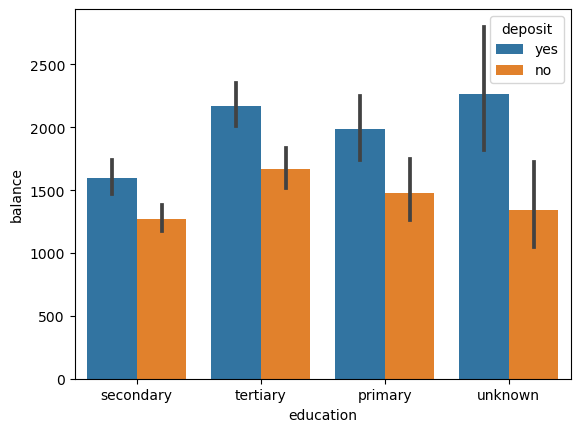

In [54]:
#Plot between education, balance and deposit
sns.barplot(x='education',y='balance',hue='deposit',data=data)

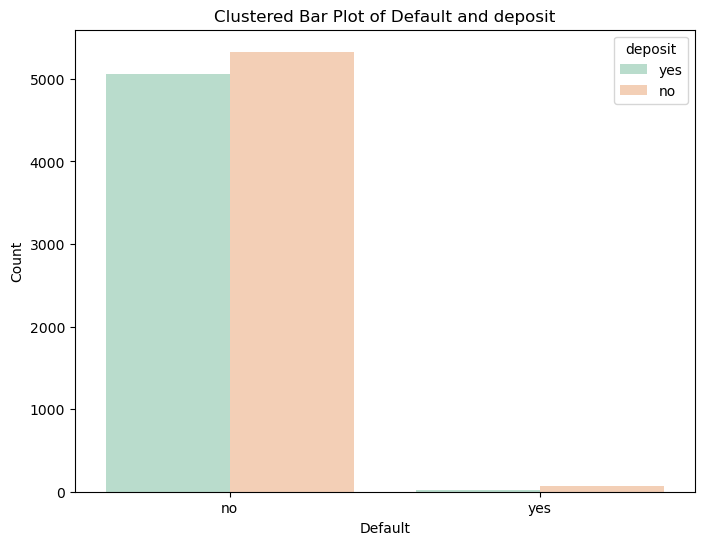

In [82]:
#Plot of Default and Deposit
plt.figure(figsize=(8, 6))
sns.countplot(x='default', hue='deposit',data=data, palette='Pastel2', dodge=True)
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Clustered Bar Plot of Default and deposit')
plt.show()

## Data Cleaning

In [9]:
#Check for null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
#Check for duplicate values
data.duplicated().sum()

0

There are no null and duplicate values. Let's check each column now.

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [12]:
for i in data.columns:
    print(i+'\n')
    print('-----------------')
    print(data[i].value_counts())

age

-----------------
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64
job

-----------------
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
marital

-----------------
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
education

-----------------
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
default

-----------------
no     10994
yes      168
Name: default, dtype: int64
balance

-----------------
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dty

In [13]:
#AGE
data['age'].median()

39.0

/tmp/ipykernel_33/3262849815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

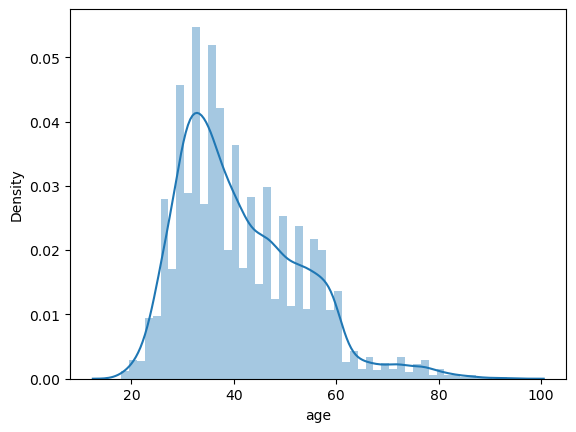

In [14]:
sns.distplot(data['age'])

We can see that the age column is distributed from 18 to 95 with median age as 39.

In [15]:
data['job'] = data['job'].replace('admin.','admin')

In [16]:
#Filtering the balance row with values greater than zero as balance cannot be negative.
data = data.query('balance>=0')

In [18]:
#Dropping the duration column. As, duration is highly correlated with deposit and may impact our results.
data.drop('duration',axis=1,inplace=True)

/tmp/ipykernel_33/3735483844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('duration',axis=1,inplace=True)


In [19]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


## DATA TRANSFORMATION

### Converting all the categorical columns into numerical data using Onehotencoder and labelencoder

In [20]:
#Using Label Encoding for y variable
le = LabelEncoder()
le_data = le.fit_transform(data[['deposit']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
le_data

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
categorical_col = data[['job','marital','education','default','housing','loan','contact','month','poutcome']]

In [23]:
#Using One Hot Encoder
enc = OneHotEncoder()
enc_data = enc.fit_transform(categorical_col)

In [24]:
enc_df = pd.DataFrame(enc_data.toarray(),columns = enc.get_feature_names_out(categorical_col.columns))

In [25]:
enc_df['deposit'] = le_data

In [26]:
enc_df

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [27]:
numerical_cols = data[['age','balance','day','campaign','pdays']]

In [28]:
numerical_cols.reset_index(drop=True, inplace=True)
enc_df.reset_index(drop=True, inplace=True)

In [29]:
df = pd.concat([numerical_cols, enc_df], axis=1)

In [30]:
df

,age,balance,day,campaign,pdays,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,2343,5,1,-1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,56,45,5,1,-1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,41,1270,5,1,-1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,55,2476,5,1,-1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,54,184,5,2,-1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,33,1,20,1,-1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10470,39,733,16,4,-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10471,32,29,19,2,-1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10472,43,0,8,2,172,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


## NORMALISATION

### Scaling all the numerical columns between 0 and 1 using StandardScaler function.

In [31]:
numerical_columns = ['age','balance','day','campaign','pdays']

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(df[numerical_columns])

# Transform the numerical columns
df[numerical_columns] = scaler.transform(df[numerical_columns])


In [34]:
df

,age,balance,day,campaign,pdays,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,1.465997,0.210477,-1.263301,-0.552861,-0.489184,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1.216923,-0.487683,-1.263301,-0.552861,-0.489184,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,-0.028449,-0.115513,-1.263301,-0.552861,-0.489184,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1.133898,0.250884,-1.263301,-0.552861,-0.489184,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1.050873,-0.445454,-1.263301,-0.182448,-0.489184,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,-0.692647,-0.501051,0.518138,-0.552861,-0.489184,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10470,-0.194499,-0.278661,0.043087,0.558378,-0.489184,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10471,-0.775672,-0.492544,0.399375,-0.182448,-0.489184,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10472,0.137600,-0.501355,-0.907013,-0.182448,1.095059,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


## TRAINING THE MODEL

In [35]:
X = df.drop(['deposit'],axis=1)

In [36]:
X

,age,balance,day,campaign,pdays,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.465997,0.210477,-1.263301,-0.552861,-0.489184,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.216923,-0.487683,-1.263301,-0.552861,-0.489184,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.028449,-0.115513,-1.263301,-0.552861,-0.489184,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.133898,0.250884,-1.263301,-0.552861,-0.489184,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.050873,-0.445454,-1.263301,-0.182448,-0.489184,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,-0.692647,-0.501051,0.518138,-0.552861,-0.489184,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10470,-0.194499,-0.278661,0.043087,0.558378,-0.489184,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10471,-0.775672,-0.492544,0.399375,-0.182448,-0.489184,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10472,0.137600,-0.501355,-0.907013,-0.182448,1.095059,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
y = df.loc[:,'deposit']

In [38]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10469    0
10470    0
10471    0
10472    0
10473    0
Name: deposit, Length: 10474, dtype: int64

In [39]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [40]:
#Using Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Accuracy for train:",accuracy_train)
print("Accuracy:", accuracy)

Accuracy for train: 1.0
Accuracy: 0.7292395800190901


In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(),param_grid = param_grid,cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.7337321946860025


### Getting the important features

In [43]:
# Get the feature importances
importance_scores = clf.feature_importances_

# Associate the importance scores with the feature names
feature_importance = dict(zip(X_train.columns, importance_scores))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance}")

balance: 0.1452421605544156
age: 0.13480785910665255
day: 0.11812550042690953
campaign: 0.06608985362460709
pdays: 0.04960170857745946
poutcome_success: 0.02970213978494996
contact_unknown: 0.029402603508705973
contact_cellular: 0.018483204258332456
housing_no: 0.017994559733777744
poutcome_unknown: 0.017027080662960437


In [44]:
imp_features = pd.DataFrame(sorted_features,columns = ['column','score'])
imp_features


,column,score
0,balance,0.145242
1,age,0.134808
2,day,0.118126
3,campaign,0.066090
4,pdays,0.049602
5,poutcome_success,0.029702
6,contact_unknown,0.029403
7,contact_cellular,0.018483
8,housing_no,0.017995
9,poutcome_unknown,0.017027


([<matplotlib.axis.XTick at 0x7a521b81fbb0>,
 [Text(0, 0, 'balance'),
  Text(1, 0, 'age'),
  Text(2, 0, 'day'),
  Text(3, 0, 'campaign'),
  Text(4, 0, 'pdays'),
  Text(5, 0, 'poutcome_success'),
  Text(6, 0, 'contact_unknown'),
  Text(7, 0, 'contact_cellular'),
  Text(8, 0, 'housing_no'),
  Text(9, 0, 'poutcome_unknown')])

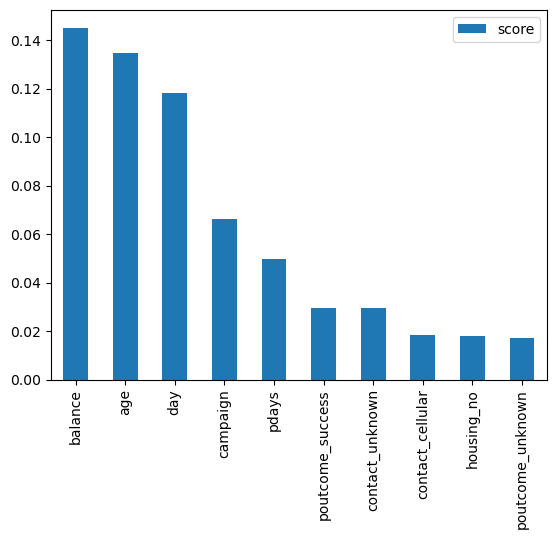

In [45]:
imp_features[:10].plot(kind='bar')
plt.xticks(range(0,10),imp_features['column'][:10])

### ANALYSING THOSE IMP FEATURES

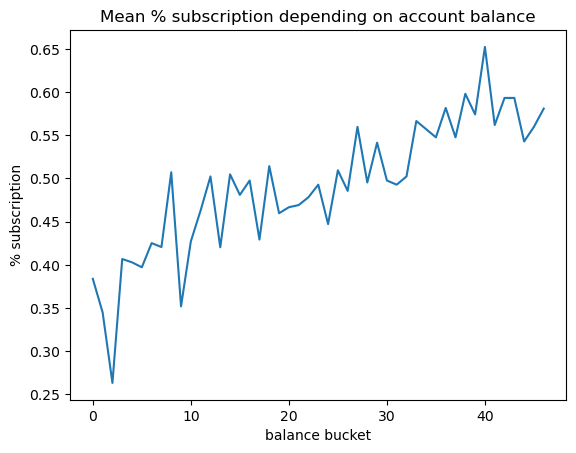

In [46]:
df_new = df.copy()

#introduce new column 'balance_buckets' to  ''
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['deposit'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

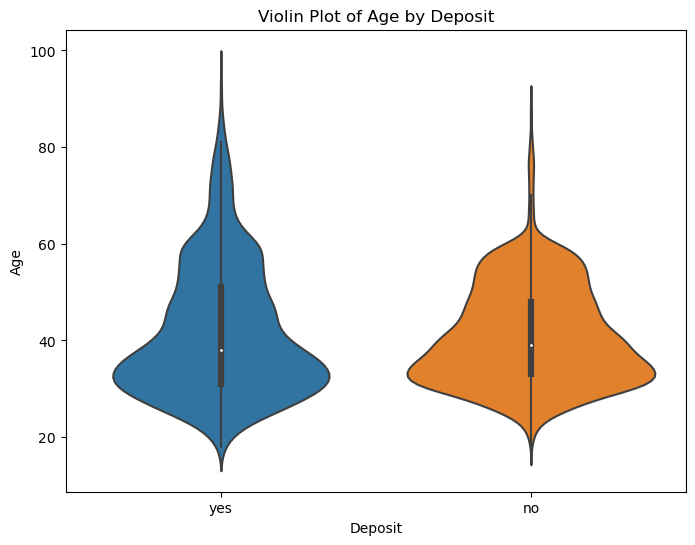

In [59]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='deposit', y='age',data=data)
plt.xlabel('Deposit')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Deposit')
plt.show()

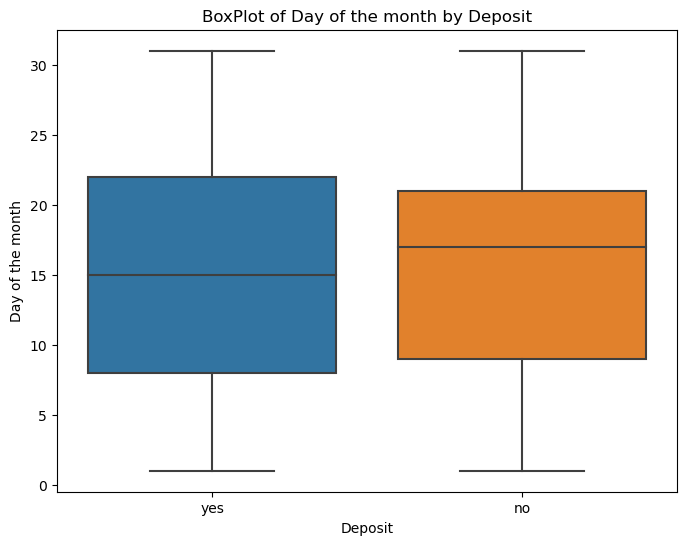

In [76]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='day',data=data)
plt.xlabel('Deposit')
plt.ylabel('Day of the month')
plt.title('BoxPlot of Day of the month by Deposit')
plt.show()